<hr>
<center>
<h1> Final Project - Crime in Chicago <h1>
    <hr>

This report provides visualisation of Chicago crime and the relationship between different data.  

# Data  
The data used in this report comes from https://www.kaggle.com/datasets/currie32/crimes-in-chicago.  There are multiple dataset reflects reported incidents of crime (with the exception of murders where data exists for each victim) that occurred in the City of Chicago from 2001 to 2017. Data is extracted from the Chicago Police Department's CLEAR (Citizen Law Enforcement Analysis and Reporting) system.

For the purpose of this project, the most recent datasets covering the years 2008 to 2011 and 2012 to 2017 were selected for analysis.

https://www.kaggle.com/datasets/currie32/crimes-in-chicago?select=Chicago_Crimes_2008_to_2011.csv
https://www.kaggle.com/datasets/currie32/crimes-in-chicago?select=Chicago_Crimes_2012_to_2017.csv


Each row represents a unique observation set and each observation set contains the attributes shown in the table below

| Attribute           | Description                                                                                                                   |
|---------------------|-------------------------------------------------------------------------------------------------------------------------------|
| ID                  | Unique identifier for the record                                                                                              |
| Case Number         | The Chicago Police Department RD Number (Records Division Number), which is unique to the incident                           |
| Date                | Date when the incident occurred (sometimes a best estimate)                                                                   |
| Block               | The partially redacted address where the incident occurred, placing it on the same block as the actual address                |
| IUCR                | The Illinois Uniform Crime Reporting code, directly linked to the Primary Type and Description                               |
| Primary Type        | The primary description of the IUCR code                                                                                      |
| Description         | The secondary description of the IUCR code, a subcategory of the primary description                                          |
| Location Description| Description of the location where the incident occurred                                                                       |
| Arrest              | Indicates whether an arrest was made                                                                                          |
| Domestic            | Indicates whether the incident was domestic-related as defined by the Illinois Domestic Violence Act                           |
| Beat                | Indicates the beat where the incident occurred                                                                                |
| District            | Indicates the police district where the incident occurred                                                                     |
| Ward                | The ward (City Council district) where the incident occurred                                                                 |
| Community Area      | Indicates the community area where the incident occurred                                                                      |
| FBI Code            | Indicates the crime classification as outlined in the FBI's National Incident-Based Reporting System (NIBRS)                  |
| X Coordinate        | The x coordinate of the location where the incident occurred in State Plane Illinois East NAD 1983 projection                 |
| Y Coordinate        | The y coordinate of the location where the incident occurred in State Plane Illinois East NAD 1983 projection                 |
| Year                | Year the incident occurred                                                                                                    |
| Updated On          | Date and time the record was last updated                                                                                     |
| Latitude            | The latitude of the location where the incident occurred                                                                      |
| Longitude           | The longitude of the location where the incident occurred                                                                     |
| Location            | The location where the incident occurred in a format that allows for creation of maps and other geographic operations on data   |


# Goal

The goal of this project is to answer two specific questions:

1. To analyze the trend of crime from 2008 to 2017 and identify any notable patterns, fluctuations, or changes in crime rates over this period.

2. To explore the correlation between the type of crime, time, and location, investigating how different types of crimes vary in occurrence over time and across various locations.

# Data preparation

To begin the analysis, we import the necessary libraries, including pandas, numpy, seaborn, and matplotlib. We then read in the two datasets: "Chicago_Crimes_2008_to_2011.csv" and "Chicago_Crimes_2012_to_2017.csv". The data is concatenated into a single dataframe called df.

In [9]:
# Import the libraries
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


# Read the two datasets
df1 = pd.read_csv('Chicago_Crimes_2008_to_2011.csv',on_bad_lines='skip')
df2 = pd.read_csv('Chicago_Crimes_2012_to_2017.csv',on_bad_lines='skip')

df = pd.concat([df1, df2], ignore_index=False, axis=0)

del df1
del df2

# Display the first few rows of the dataset
df.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,388,4785,HP610824,10/07/2008 12:39:00 PM,000XX E 75TH ST,0110,HOMICIDE,FIRST DEGREE MURDER,ALLEY,True,...,6.0,69.0,01A,1178207.0,1855308.0,2008,08/17/2015 03:03:40 PM,41.758276,-87.622451,"(41.758275857, -87.622451031)"
1,835,4786,HP616595,10/09/2008 03:30:00 AM,048XX W POLK ST,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,True,...,24.0,25.0,01A,1144200.0,1895857.0,2008,08/17/2015 03:03:40 PM,41.870252,-87.746069,"(41.87025207, -87.746069362)"
2,1334,4787,HP616904,10/09/2008 08:35:00 AM,030XX W MANN DR,0110,HOMICIDE,FIRST DEGREE MURDER,PARK PROPERTY,False,...,18.0,66.0,01A,1157314.0,1859778.0,2008,08/17/2015 03:03:40 PM,41.770990,-87.698901,"(41.770990476, -87.698901469)"
3,1907,4788,HP618616,10/10/2008 02:33:00 AM,052XX W CHICAGO AVE,0110,HOMICIDE,FIRST DEGREE MURDER,RESTAURANT,False,...,37.0,25.0,01A,1141065.0,1904824.0,2008,08/17/2015 03:03:40 PM,41.894917,-87.757358,"(41.894916924, -87.757358147)"
4,2436,4789,HP619020,10/10/2008 12:50:00 PM,026XX S HOMAN AVE,0110,HOMICIDE,FIRST DEGREE MURDER,GARAGE,False,...,22.0,30.0,01A,1154123.0,1886297.0,2008,08/17/2015 03:03:40 PM,41.843826,-87.709893,"(41.843826272, -87.709893465)"


As we have brief description about our dataset. We can start do some data cleaning to further work in a better dataset.

We perform data cleaning by filtering the dataset to exclude the year 2017 and sampling a random subset of 50,000 rows. This step helps in reducing the computational load and focusing on a smaller representative sample for analysis.

In [10]:
df = df[df['Year'] != 2017]
# Count the number of attributes
num_attributes = df.shape[0]

print("Number of attributes before sampling:", num_attributes);

df = df.sample(n = 50000)

# Count the number of attributes
num_attributes = df.shape[0]

print("Number of attributes after sampling:", num_attributes);

Number of attributes before sampling: 4134067
Number of attributes after sampling: 50000


We check if the dataset has any missing values and drop rows where all values are missing. This step ensures that we are working with complete and valid data.

In [11]:
# Drop if all values in a row are missing
df.dropna(how='all', inplace=True)

# Count the number of attributes
num_attributes = df.shape[0]

print("Number of attributes after sampling:", num_attributes);

Number of attributes after sampling: 50000


We convert the 'Date' column to pandas datetime format to enable easier manipulation and analysis of date-based features.

In [12]:
# convert dates to pandas datetime format
df.Date = pd.to_datetime(df.Date, format='%m/%d/%Y %I:%M:%S %p')
df.index = pd.DatetimeIndex(df.Date)
df.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
Date,,,,,,,,,,,,,,,,,,,,,
2009-12-18 21:30:00,1678330,7280752,HR696337,2009-12-18 21:30:00,052XX S WHIPPLE ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,...,14.0,63.0,08B,1156933.0,1869728.0,2009,02/04/2016 06:33:39 AM,41.798302,-87.700029,"(41.79830241, -87.700029445)"
2011-10-01 00:00:00,835952,9841864,HX491350,2011-10-01 00:00:00,027XX E 76TH ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,...,7.0,43.0,11,NaN,NaN,2011,08/17/2015 03:03:40 PM,NaN,NaN,NaN
2009-04-07 23:00:00,1401277,6851097,HR257559,2009-04-07 23:00:00,037XX W MONTROSE AVE,0810,THEFT,OVER $500,OTHER,False,...,39.0,16.0,06,1150463.0,1928978.0,2009,02/04/2016 06:33:39 AM,41.961019,-87.722209,"(41.961019281, -87.722209234)"
2016-06-14 11:00:00,6068337,10559894,HZ306893,2016-06-14 11:00:00,016XX N HARLEM AVE,1330,CRIMINAL TRESPASS,TO LAND,SIDEWALK,True,...,36.0,25.0,26,1127853.0,1909983.0,2016,06/21/2016 03:56:51 PM,41.909307,-87.805767,"(41.909307068, -87.80576669)"
2010-12-11 14:00:00,2039589,7843898,HS656155,2010-12-11 14:00:00,014XX N CLAREMONT AVE,051A,ASSAULT,AGGRAVATED: HANDGUN,SIDEWALK,True,...,1.0,24.0,04A,1160479.0,1909519.0,2010,02/04/2016 06:33:39 AM,41.907421,-87.685925,"(41.907420613, -87.685925328)"


We will not be using any of those columns in our analysis to answer the questions, so we filter them out

In [13]:
df = df.drop(['Unnamed: 0', 'Case Number', 'IUCR', 'Updated On', 'Year', 'FBI Code',
         'X Coordinate', 'Y Coordinate', 'Location', 'Date', 'Block'], axis=1)
df.columns

Index(['ID', 'Primary Type', 'Description', 'Location Description', 'Arrest',
       'Domestic', 'Beat', 'District', 'Ward', 'Community Area', 'Latitude',
       'Longitude'],
      dtype='object')

In [14]:
# Get information about the final dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 50000 entries, 2009-12-18 21:30:00 to 2016-09-01 09:00:00
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    50000 non-null  int64  
 1   Primary Type          50000 non-null  object 
 2   Description           50000 non-null  object 
 3   Location Description  49980 non-null  object 
 4   Arrest                50000 non-null  bool   
 5   Domestic              50000 non-null  bool   
 6   Beat                  50000 non-null  int64  
 7   District              49999 non-null  float64
 8   Ward                  50000 non-null  float64
 9   Community Area        49985 non-null  float64
 10  Latitude              49374 non-null  float64
 11  Longitude             49374 non-null  float64
dtypes: bool(2), float64(5), int64(2), object(3)
memory usage: 4.3+ MB


# Exploratory Data Analysis

## 1. Trend

We start by analyzing the trend of crime over the years. We group the data by year and count the number of crimes in each year. This helps us identify any patterns or changes in the crime rates over time.

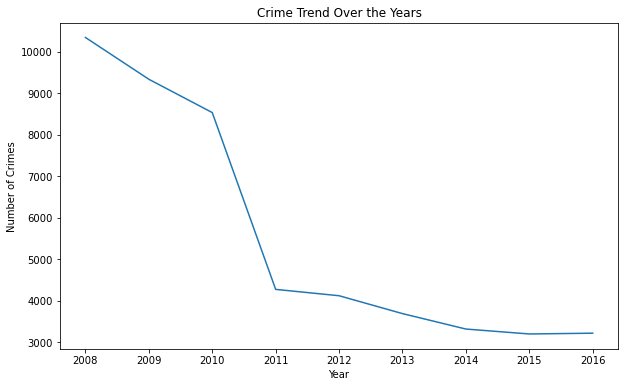

In [15]:
# YEARLY
crime_trend_year = df.groupby([df.index.year]).size()

# Plot the crime trend over the years
crime_trend_year.plot(kind='line', figsize=(10, 6), xlabel='Year', ylabel='Number of Crimes', 
                 title='Crime Trend Over the Years');


To further and more detailed visualization, we can group data by both year and month to see the more detail trend

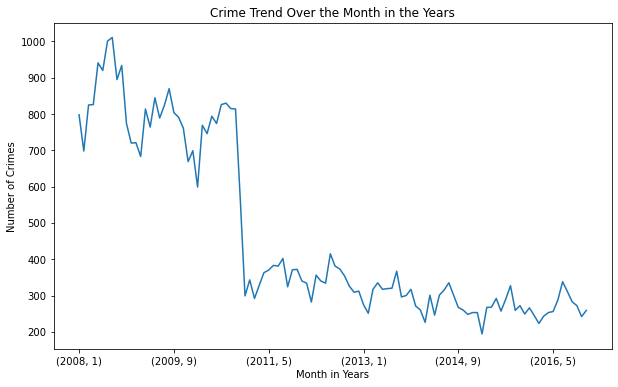

In [16]:
# MONTHLY
crime_trend_month = df.groupby([df.index.year,df.index.month]).size()

# Plot the crime trend over the years
crime_trend_month.plot(kind='line', figsize=(10, 6), xlabel='Month in Years', ylabel='Number of Crimes', 
                 title='Crime Trend Over the Month in the Years');

As seen above, we can tell that the number of crimes drastically reduced in the period from 2008 to 2016.

We can hence use heatmap to further see the correlation of month and year with the total crime count

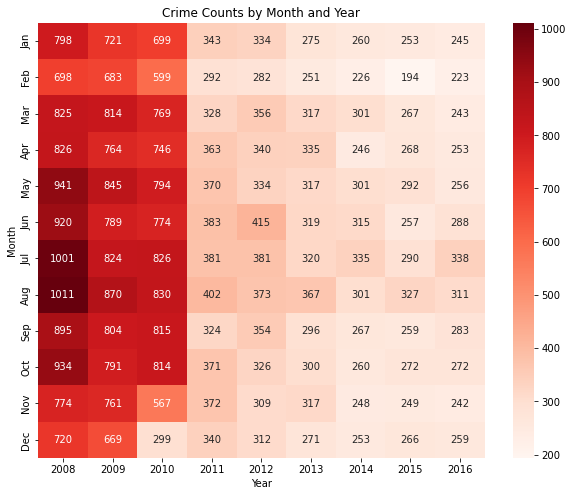

In [17]:
# Pivot the data to get the crime counts by month and year
month_by_year = df.pivot_table(values='ID', index=df.index.month, columns=df.index.year, aggfunc=np.size).fillna(0)

# Set the index labels to month names
month_by_year.index = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Set the size of the heatmap figure
plt.figure(figsize=(10, 8))

# Create the heatmap using seaborn
sns.heatmap(month_by_year, cmap='Reds', annot=True, fmt='g')

# Set the title and labels
plt.title('Crime Counts by Month and Year')
plt.xlabel('Year')
plt.ylabel('Month')

# Display the heatmap
plt.show()


In addition to highlighting the peak in crime rates between 2008 and 2010, the heat map also provides insights into the temporal distribution of crime throughout the year. It reveals that crime trends tend to reach their highest point around August in most years. This observation suggests that there may be underlying factors or seasonal influences that contribute to an increase in criminal activity during this period.

To further explore the relationship between crime counts and the day of the week, a line graph can be plotted using similar methodology. 

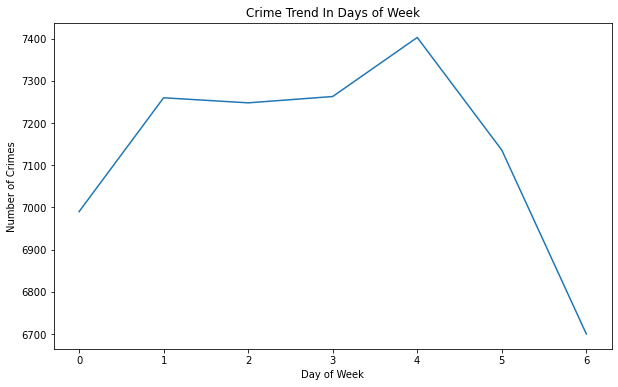

In [18]:
# DAY OF WEEK
crime_trend_dayofweek = df.groupby([df.index.dayofweek]).size()

# Plot the crime trend over the years
crime_trend_dayofweek.plot(kind='line', figsize=(10, 6), xlabel='Day of Week', ylabel='Number of Crimes', 
                 title='Crime Trend In Days of Week');

The line graph examining crime trends by days of the week clearly indicates that crime rates reach their highest point on day 4, which corresponds to Friday. This observation suggests that Fridays tend to have a higher incidence of criminal activity compared to other days of the week.

To further analyze the temporal distribution of crime, we can plot a line graph to depict the crime incidence within different hours of the day. 

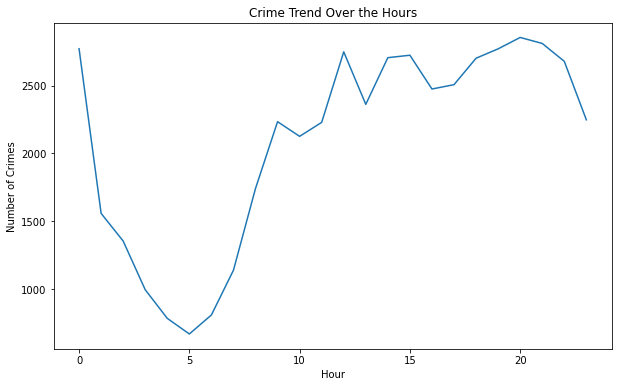

In [19]:
# HOUR
crime_trend_hour = df.groupby([df.index.hour]).size()

# Plot the crime trend
crime_trend_hour.plot(kind='line', figsize=(10, 6), xlabel='Hour', ylabel='Number of Crimes', 
                 title='Crime Trend Over the Hours');

The observation that the number of crimes bottoms out around 5 am in the morning is reasonable and aligns with expectations. During these early hours, most people are asleep, and there is generally less activity and fewer opportunities for criminal incidents to occur. This finding suggests that the time of day plays a significant role in influencing crime rates.

To further explore the relationship between crime counts and both the day of the week and hours of the day, a heat map can be used again.

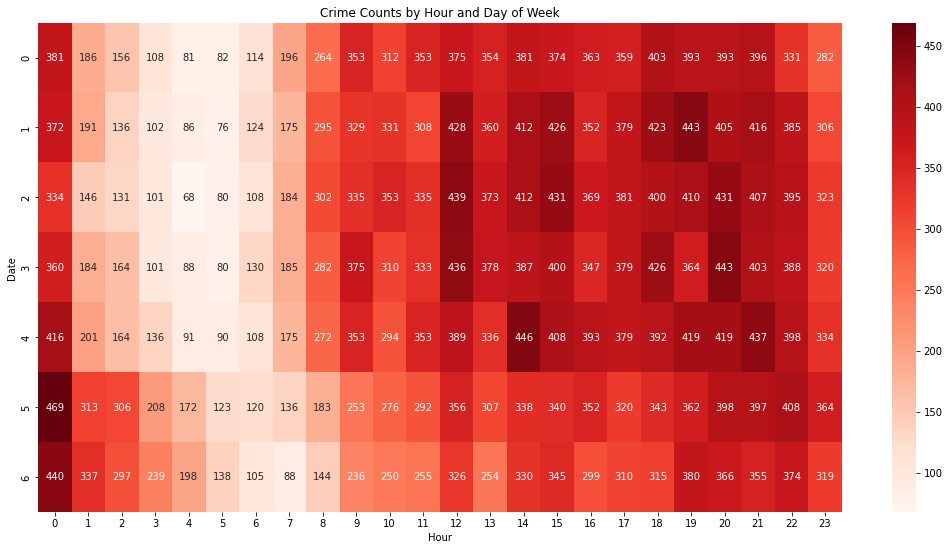

In [20]:
hour_by_week  = df.pivot_table(values='ID', index=df.index.dayofweek, 
                                   columns=df.index.hour, aggfunc=np.size).fillna(0)


# Set the size of the heatmap figure
plt.figure(figsize=(18,9))
# Create the heatmap using seaborn
sns.heatmap(hour_by_week, cmap='Reds', annot=True, fmt='g')

# Set the title and labels
plt.title('Crime Counts by Hour and Day of Week')
plt.xlabel('Hour')
# Display the heatmap
plt.show()

From the heat map, we observe that crime incidents are more prevalent during certain hours of the day. The early morning hours, typically from 12 AM to 6 AM, exhibit the lowest crime rates.

In conclusion, the analysis of the "Crimes in Chicago" dataset reveals a significant downward trend in crime rates over the past years. Furthermore, the hour of the day emerges as the most influential time stamp factor that affects crime counts, with crime incidents being more prevalent in the afternoon and less frequent during the early morning hours. 

## 2. Correlation

### 2.1. Crime Type Analysis

In this section, we explore the different types of crimes present in the dataset.

To begin, we group the dataset based on the "Primary Type" attribute, which categorizes crimes into distinct types. This grouping allows us to aggregate the data and calculate the count of each crime type.

In [21]:
# Analyze crime types
crime_counts = df['Primary Type'].value_counts()

# Create a DataFrame from the crime counts
crime_counts_df = pd.DataFrame({'Crime Type': crime_counts.index, 'Count': crime_counts.values})

crime_counts_df

,Crime Type,Count
0,THEFT,10703
1,BATTERY,8815
2,CRIMINAL DAMAGE,5753
3,NARCOTICS,5234
4,BURGLARY,3334
5,OTHER OFFENSE,3039
6,ASSAULT,2977
7,MOTOR VEHICLE THEFT,2220
8,DECEPTIVE PRACTICE,2025
9,ROBBERY,1948


Upon analyzing the dataset, it is evident that theft is the most prevalent crime type. 


To visually represent the distribution of crime types, a pie chart is the most ideal choice. The pie chart provides a clear overview of the proportion of each crime type in the dataset. Below is the pie chart depicting the distribution of crime types.

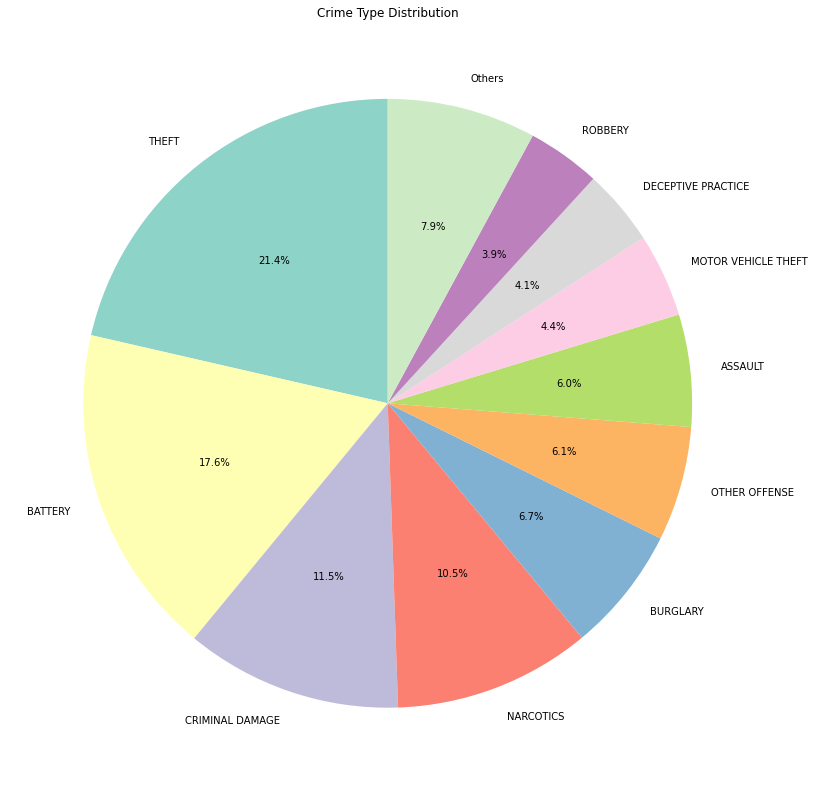

In [22]:
# Calculate the threshold for merging into "Others"
threshold = 0.03  # 3% represented as 0.03

# Identify crime types with frequencies smaller than the threshold
mask = crime_counts / len(df) < threshold

# Update crime types to be labeled as "Others"
crime_counts.loc[mask] = len(df) - crime_counts.loc[~mask].sum()
crime_counts = crime_counts.loc[~mask]

# Add the "Others" category
crime_counts['Others'] = len(df) - crime_counts.sum()

# Define a color palette for the pie chart
colors = plt.cm.Set3.colors 
# Plot the pie chart with merged "Others" category and the chosen color theme
plt.figure(figsize=(14, 14))
crime_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Crime Type Distribution')
plt.ylabel('')
plt.show()

Based on the pie chart, the top 5 most common crime types in our dataset are as follows:

- Theft: 21.5%
- Battery: 17.8%
- Criminal Damage: 11.4%
- Narcotics: 10.5%
- Burglary: 6.2%

These crime types account for a significant portion of the total crimes recorded. The highest proportion is attributed to Theft, followed by Battery, Criminal Damage, Narcotics, and Burglary. 

### 2.2. Crime Type by Time

To further analyze the top 5 primary crime types, namely 'THEFT', 'BATTERY', 'CRIMINAL DAMAGE', 'NARCOTICS', and 'BURGLARY', I plotted a line graph to examine their correlation with respect to the years.

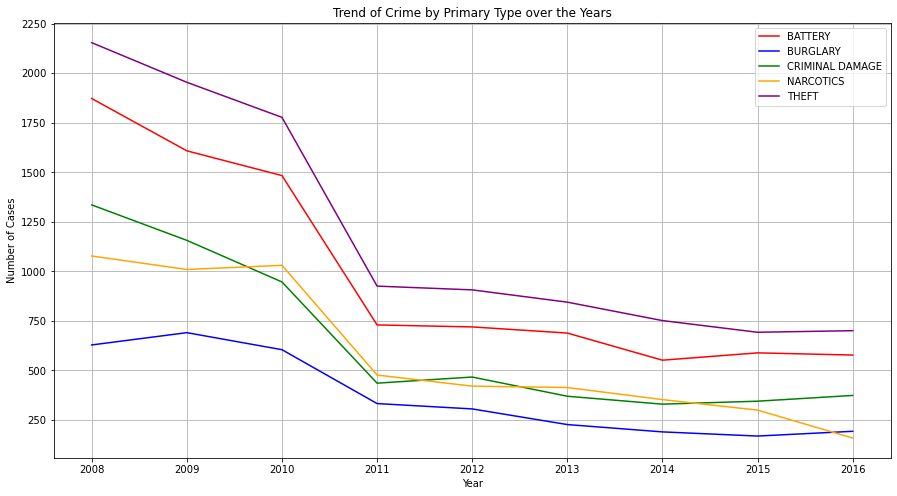

In [23]:
# Filter the dataset to include only the  primary types
top5 = ['THEFT', 'BATTERY', 'CRIMINAL DAMAGE', 'NARCOTICS', 'BURGLARY']
top5_data = df[df['Primary Type'].isin(top5)]

# Group the filtered data by year and primary type and calculate the count of cases
top5_df = top5_data.groupby([top5_data.index.year, 'Primary Type']).size().unstack().fillna(0)

# Define line colors for the primary types
line_colors = ['red', 'blue', 'green', 'orange', 'purple']

# Plot the trend lines for the selected primary types with different line colors
plt.figure(figsize=(15,8))
for i, primary_type in enumerate(top5_df):
    plt.plot(top5_df.index, top5_df[primary_type], label=primary_type, color=line_colors[i])

# Set the title, x-axis label, and y-axis label
plt.title('Trend of Crime by Primary Type over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Cases')

# Display a legend and gridlines
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


During the period from 2008 to 2011, there is a significant decline in the crime count for all five types. However, there doesn't seem to be a clear relationship between the year and the categorical type of crime.

To further investigate correlations, we shift our focus to the day of the week and the categorical type. To gain a comprehensive overview, we employ a heatmap to visualize the variations. The heatmap provides a clear representation of the differences in crime counts based on the day of the week and the specific type of crime. By examining the heatmap, we can identify any patterns or disparities in crime occurrences across different days and types.

In order to ensure a fair comparison, as the population size of each crime type varies, we use a normalization method in statistics to normalize our data before further plotting it in the heatmap. To achieve this, we utilize the MinMaxScaler from the sklearn.preprocessing library. This normalization process allows us to accurately compare the relative frequencies of different crime types across the days of the week.

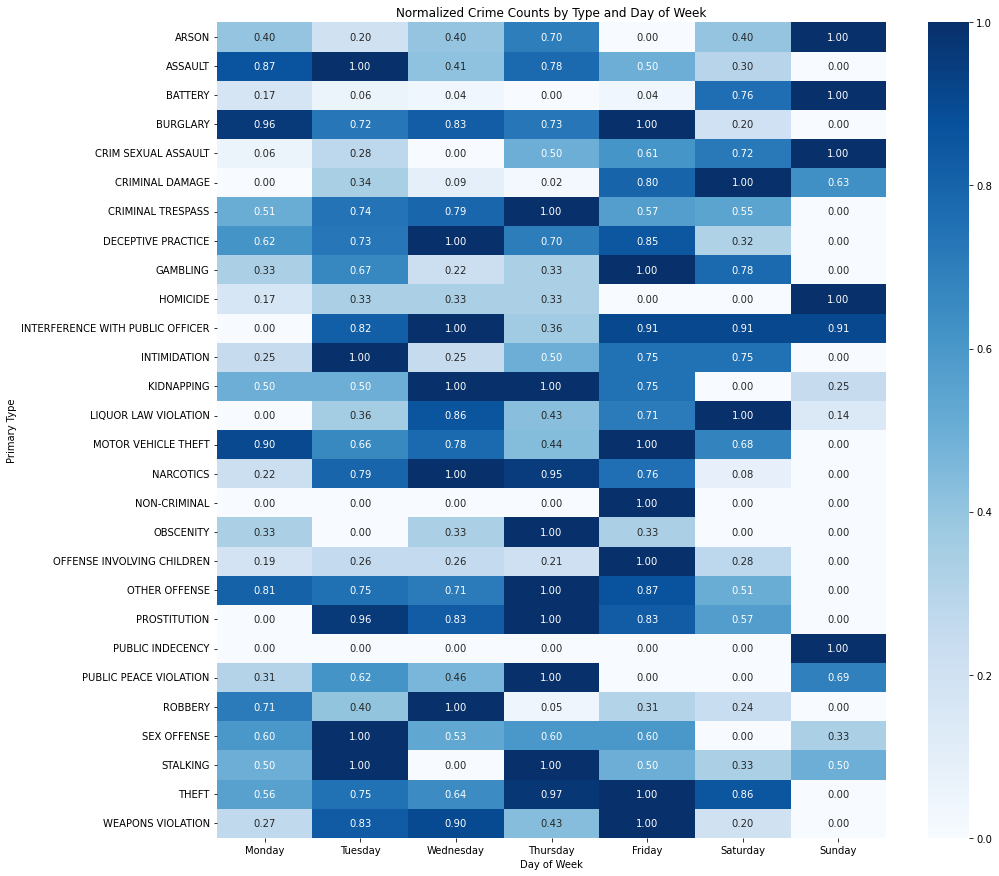

In [24]:
# Import the necessary libraries
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Create a pivot table to calculate crime counts by crime type and day of the week
dayofweek_by_type = df.pivot_table(values='ID', index=df['Primary Type'], 
                                   columns=df.index.dayofweek, aggfunc=np.size).fillna(0)

# Set the index labels to day names
dayofweek_by_type.columns = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Normalize the crime counts using MinMaxScaler
dayofweek_by_type_normalized = pd.DataFrame(scaler.fit_transform(dayofweek_by_type.T).T, 
                                             index=dayofweek_by_type.index, columns=dayofweek_by_type.columns)

# Set the size of the heatmap figure
plt.figure(figsize=(15, 15))

# Create the heatmap using seaborn
sns.heatmap(dayofweek_by_type_normalized, cmap='Blues', annot=True, fmt='.2f')

# Set the title and labels
plt.title('Normalized Crime Counts by Type and Day of Week')
plt.xlabel('Day of Week')

# Display the heatmap
plt.show()


Each crime type appears to have a peak day of the week when incidents are more frequent. However, this observation does not indicate a particularly strong correlation between the day of the week and the crime type.

In addition to analyzing the day of the week, it is crucial to examine the hour of the day when these incidents occur. By exploring the data, we can identify any trends or patterns in crime occurrence during specific hours. To ensure a fair comparison, the data is normalized to account for variations in crime frequency across different hours. This normalization process allows us to accurately compare the relative frequencies of crime incidents during different hours of the day.

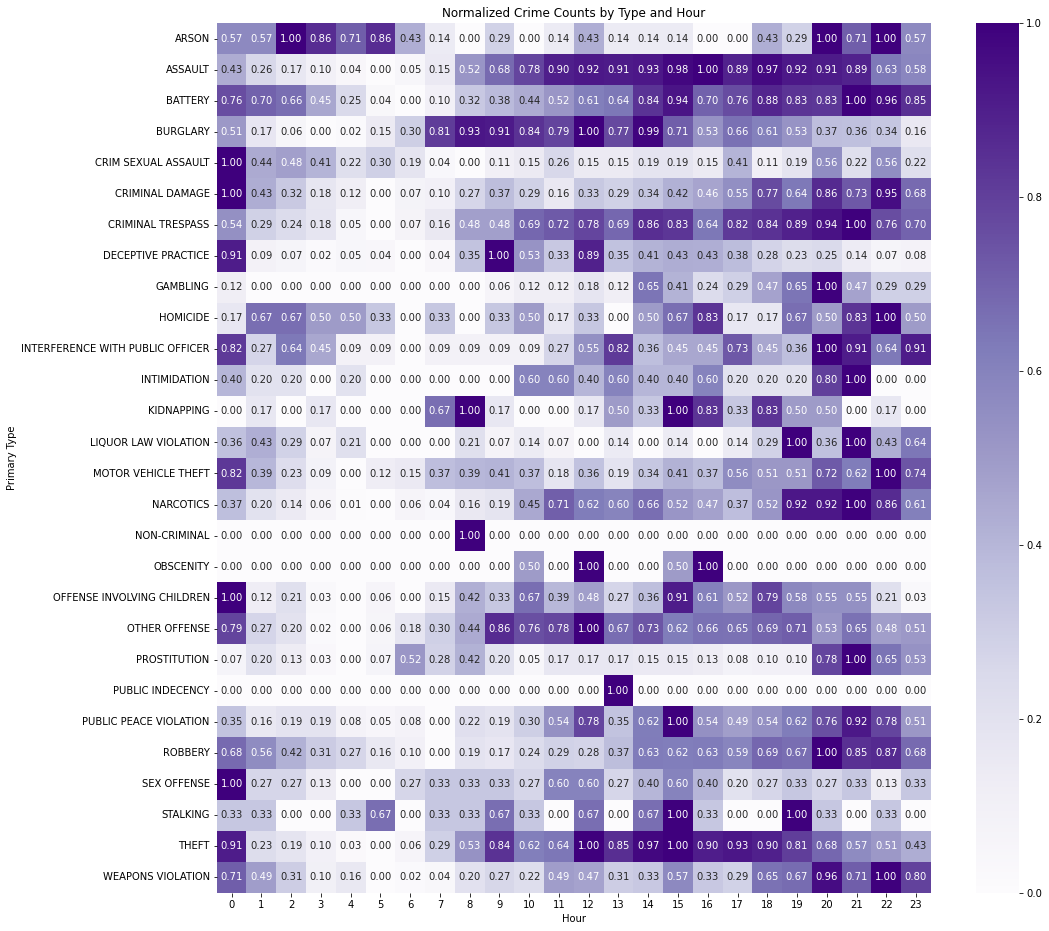

In [25]:
type_by_hour  = df.pivot_table(values='ID', index=df['Primary Type'], 
                                   columns=df.index.hour, aggfunc=np.size).fillna(0)

type_by_hour_normalized = pd.DataFrame(scaler.fit_transform(type_by_hour.T).T, 
                                       index=type_by_hour.index, columns=type_by_hour.columns)

# Set the size of the heatmap figure
plt.figure(figsize=(16, 16))

# Create the heatmap using seaborn
sns.heatmap(type_by_hour_normalized,cmap='Purples', annot=True, fmt='.2f')

# Set the title and labels
plt.title('Normalized Crime Counts by Type and Hour')
plt.xlabel('Hour')

# Display the heatmap
plt.show()

## 2.3 Crime Type by Location

To determine which variables should be considered for further analysis related to location, we first plot a correlation heat map. This heat map provides an overview of the correlations between different variables. By examining the correlation values, we can identify which variables have a stronger relationship with the crime type.

The correlation calculation and heat map plotting are performed using the following code:

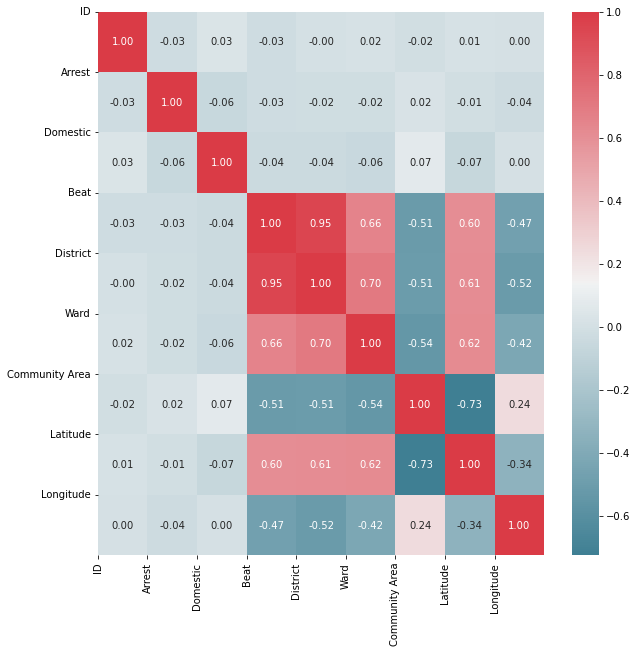

In [26]:
def heatMap(df):
    #Create Correlation df
    corr = df.corr()
    #Plot figsize
    fig, ax = plt.subplots(figsize=(10, 10))
    #Generate Color Map, red & blue
    colormap = sns.diverging_palette(220, 10, as_cmap=True)
    #Generate Heat Map, allow annotations and place floats in map
    sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f")
    #Apply xticks
    plt.xticks(range(len(corr.columns)), corr.columns);
    #Apply yticks
    plt.yticks(range(len(corr.columns)), corr.columns)
    #show plot
    plt.show()
    
heatMap(df)

Based on the correlation heatmap, we observe a strong positive correlation between the variables Latitude, Beat, District, and Ward. This implies that changes in latitude are accompanied by corresponding changes in the values of Beat, District, and Ward. This suggests a spatial relationship or pattern between these variables, indicating that certain beats, districts, and wards are clustered or organized along latitude coordinates.

To further investigate this relationship, we will focus on the District variable and analyze its impact on the overall number of crimes and within each crime category.

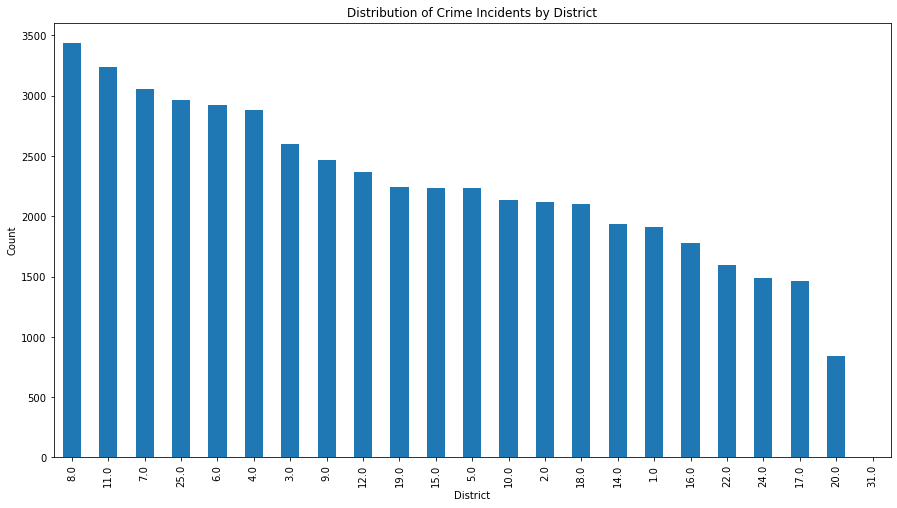

In [27]:
import matplotlib.pyplot as plt

# Group the data by 'District' and count the occurrences
district_counts = df['District'].value_counts()

# Create a bar chart
plt.figure(figsize=(15, 8))
district_counts.plot(kind='bar')

# Set labels and title
plt.xlabel('District')
plt.ylabel('Count')
plt.title('Distribution of Crime Incidents by District')

# Show the plot
plt.show()


The analysis of the District variable in relation to the total number of crimes did not reveal any significant correlation.

We hence use a heatmap to analyze the correlation between districts and individual crime categories. This allows us to identify any patterns or associations between districts and specific types of crimes.

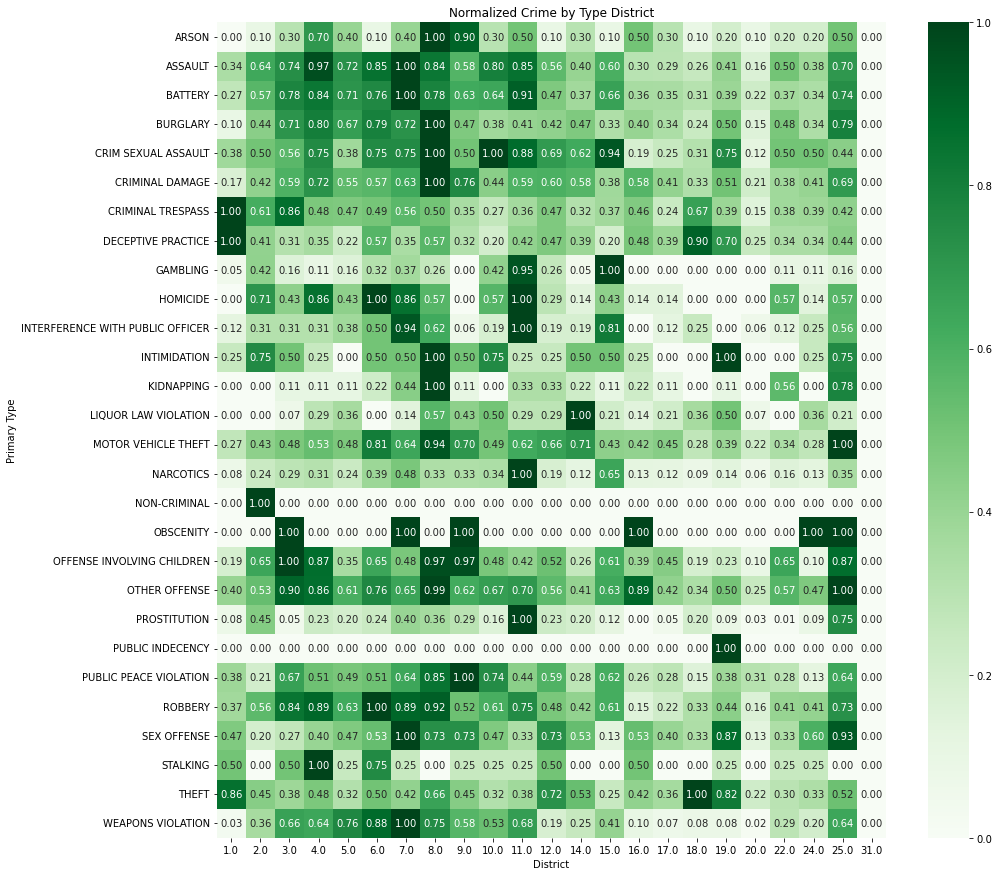

In [28]:
type_by_district  = df.pivot_table(values='ID', index=df['Primary Type'], 
                                   columns=df['District'], aggfunc=np.size).fillna(0)

type_by_district_normalized = pd.DataFrame(scaler.fit_transform(type_by_district.T).T, 
                                       index=type_by_district.index, columns=type_by_district.columns)

# Set the size of the heatmap figure
plt.figure(figsize=(15, 15))

# Create the heatmap using seaborn
sns.heatmap(type_by_district_normalized,cmap='Greens', annot=True, fmt='.2f')

# Set the title and labels
plt.title('Normalized Crime by Type District')
plt.xlabel('District')

# Display the heatmap
plt.show()

We can observe that certain districts have a higher concentration of specific primary types of crimes. This indicates a localized pattern where certain crimes are more prevalent in particular districts. 

Another approach we can take is to utilize the longitude and latitude attributes to plot the crime data on an actual map. This can be accomplished using the Folium library, which is a powerful Python library for creating interactive maps. By incorporating the longitude and latitude values into the Folium library, we can generate a visual representation of the crime incidents on a geographical map.

The information on how to use Folium for this purpose can be found at the following link: https://realpython.com/python-folium-web-maps-from-data/.

In [32]:
import pandas as pd
import folium
from folium.plugins import HeatMap

df_map = df.sample(500)
df_map.dropna(subset=['Latitude', 'Longitude'], inplace=True)

df_map['Latitude'] = df_map['Latitude'].astype(float)
df_map['Longitude'] = df_map['Longitude'].astype(float)

map = folium.Map(location=[df_map['Latitude'].mean(), df_map['Longitude'].mean()],
                 tiles="OpenStreetMap", zoom_start=10)
# Add markers for each data point
for index, row in df_map.iterrows():
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=2,  # Adjust the radius of the dot as needed
        color='orange',  # Change the color of the dot if desired
        fill=True,
        fill_color='blue'  # Change the fill color of the dot if desired
    ).add_to(map)

# Display the map
map


Furthermore, the Folium library allows us to enhance our crime map by incorporating a heatmap overlay. By utilizing the heatmap functionality provided by Folium, we can visualize the intensity or density of crime incidents in different areas.

In [33]:
# Create the df_map
heatmap = folium.Map(location=[df_map['Latitude'].mean(), df_map['Longitude'].mean()], tiles='OpenStreetMap', zoom_start=10)

# Create a list of coordinates from the DataFrame
locations = df_map[['Latitude', 'Longitude']].values.tolist()

# Add the heatmap layer to the map
HeatMap(locations).add_to(heatmap)

# Display the map
heatmap


Lastly, I utilized a kernel density estimate (KDE) plot to examine the relationship between crime types and their respective locations. The KDE plot allows for a visual representation of the density of each crime type occurrence, offering insights into the spatial distribution of different types of crimes. 

The information about kedplot is taken below:
https://seaborn.pydata.org/generated/seaborn.kdeplot.html

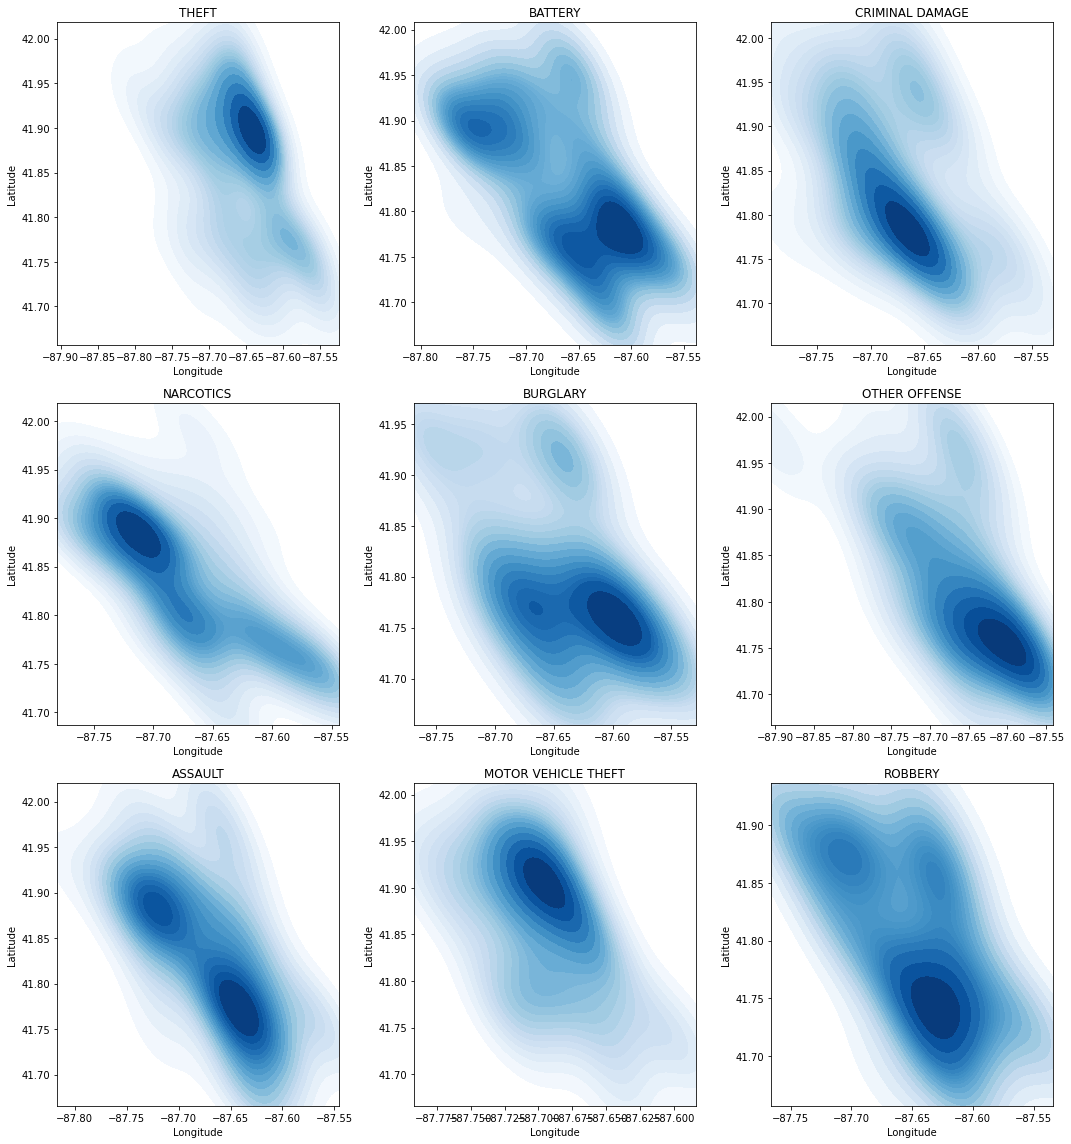

In [31]:
top9 = ['THEFT', 'BATTERY', 'CRIMINAL DAMAGE', 'NARCOTICS', 'BURGLARY', 
        'OTHER OFFENSE', 'ASSAULT', 'MOTOR VEHICLE THEFT', 'ROBBERY']

df_map = df.sample(1000)
df_map.dropna(subset=['Latitude', 'Longitude'], inplace=True)

fig, axes = plt.subplots(3, 3, figsize=(15, 16))

for i, crime_type in enumerate(top9):
    row = i // 3
    col = i % 3
    ax = axes[row, col]

    crimes_type = df_map[df_map['Primary Type'] == crime_type]
    sns.kdeplot(data=crimes_type, x='Longitude', y='Latitude', cmap='Blues', ax=ax, fill=True, levels=20)
    ax.set_title(crime_type)
    ax.set_xlim(crimes_type['Longitude'].min(), crimes_type['Longitude'].max())  # Adjust x-axis limits
    ax.set_ylim(crimes_type['Latitude'].min(), crimes_type['Latitude'].max())  # Adjust y-axis limits

plt.tight_layout()
plt.show()

The KDE plot uncovers noticeable patterns in the occurrence of various crime types, highlighting the prevalence of specific crimes in particular locations. The analysis reveals that crimes like theft and narcotics display concentrated clusters in small, specific areas, while robbery or criminal damage exhibit a slightly more dispersed distribution. However, across all crime types, there is a clear indication that location significantly influences the frequency of crime incidents. These findings strongly suggest that these specific locations may pose higher risks and be more susceptible to criminal activities, emphasizing the importance of considering safety measures when navigating these areas.

## Conclusion

To summarize, the analysis of the "Crimes in Chicago" dataset highlights several significant findings regarding crime patterns and locations. Over the period from 2008 to 2016, there was a consistent decline in crime rates, with the highest peak observed between 2008 and 2010. The month of August and Fridays exhibited the highest frequencies of crimes. However, the hour of the day was identified as the most important factor affecting crime trends, with crimes being more likely to occur after 12 pm until midnight and fewer incidents happening in the early morning hours.

Regarding crime types, theft ranked as the most prevalent category, followed by battery, criminal damage, narcotics, and burglary. Different crime categories displayed varying trends and patterns over time. However, specific neighborhoods were not mentioned in the dataset.

Overall, these findings emphasize the importance of considering the time of day when implementing crime prevention strategies. By understanding the temporal patterns of crime, authorities can allocate resources effectively and develop proactive measures to reduce crime rates and enhance public safety in Chicago.